In [9]:
import networkx as nx
import numpy as np
import math
import collections
import matplotlib.pyplot as plt
import pandas as pd

G2 = nx.read_gpickle("Users_comments_nanremoved_noselfloops_russian_1kk_October.pkl")

In [10]:
from networkx.algorithms import community

graphs = list(nx.connected_component_subgraphs(G2))

numbers = np.array([])
for c in graphs:
    n = c.number_of_nodes()
    if n == 1608:
        biggest = c
        break
        
part = community.greedy_modularity_communities(biggest)


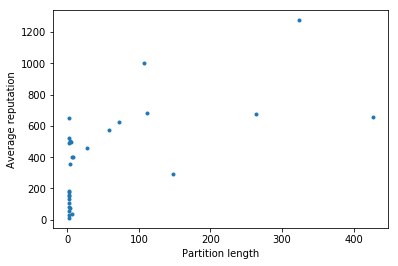

SpearmanrResult(correlation=0.66791751932805243, pvalue=7.5277266943562664e-05)


In [11]:
users_file = "Usersrussian.pkl"
users = pd.read_pickle(users_file)

reputations = []
degrees = []
average_reputations = []
part_lengths = []


for partition in part:
    average_reputation = 0
    for item in partition:
        user = users.loc[users['Id'] == item]
        if user.empty:
            continue
        reputations.append(int(user['Reputation']))
        degrees.append(biggest.degree[item])
        average_reputation += int(user['Reputation'])
    average = (average_reputation / (len(partition)))
    average_reputations.append(average)
    part_lengths.append(len(partition))
        

plt.plot(part_lengths, average_reputations, ".")
plt.xlabel("Partition length")
plt.ylabel("Average reputation")
plt.show()

from scipy import stats
print(stats.spearmanr(part_lengths, average_reputations))